In [1]:
import numpy as np
import elimination_ordering as eo
import time, pickle
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors



=-=-=--=-=-=-=--=--=-=-=-=-=-=--=-=-=-=-=-=-=--=-=-=-=--=--=-=-=-=-=-=--=-=-=-=-
<><><> Grid with p = 2 q = 4 <><><>
>>>> Round Iteration 0 :

++++ Normalization Stage ++++
++ new normalization cycle ++
++ i, n, valency, m ++
0 8 2.0 2.5
rule 4, place 0 first

1 7 3.0 2.5714285714285716

2 7 3.0 2.5714285714285716

3 7 2.0 2.5714285714285716
rule 4, place 3 first

4 6 2.0 2.6666666666666665
rule 4, place 4 first

5 5 2.0 2.4
rule 4, place 5 first

6 4 3.0 2.5
rule 1, place 6 last

7 3 1.0 1.3333333333333333
rule 3, place 7 first

current e_vector: [ 0  3  4  5  7 -1 -1  6]

++ new normalization cycle ++
++ i, n, valency, m ++
1 2 1.0 1.0
rule 1, place 1 last

2 0 0.0 nan
rule 3, place 2 first

current e_vector: [0 3 4 5 7 2 1 6]



=-=-=--=-=-=-=--=--=-=-=-=-=-=--=-=-=-=-=-=-=--=-=-=-=--=--=-=-=-=-=-=--=-=-=-=-
<><><> Grid with p = 5 q = 5 <><><>
>>>> Round Iteration 0 :

++++ Normalization Stage ++++
++ new normalization cycle ++
++ i, n, valency, m ++
0 25 2.0 3.2
rule 4, place 0 f

C:\Users\beryl\Documents\Coding\Python\eli\elimination_ordering.py:95: RuntimeWarning: invalid value encountered in double_scalars
  mean_valency = np.sum(valencies)/n #get mean valency


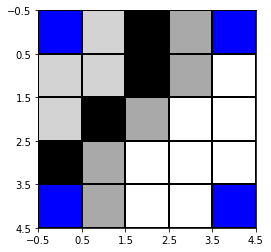

****end of grid display
while n_k > 0: 
largest b_i = 7 , placed 7 last
drop c_j = 0, j = 3
drop c_j = 0, j = 8
drop c_j = 0, j = 21
largest b_i = 11 , placed 11 last
drop c_j = 0, j = 12
drop c_j = 0, j = 16
largest b_i = 15 , placed 15 last
largest b_i = 2 , placed 2 last
n_k = 0, break
end of while n_k > 0
current e_vector: [ 0  4 20 24 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 15 11
  7]



=-=-=--=-=-=-=--=--=-=-=-=-=-=--=-=-=-=-=-=-=--=-=-=-=--=--=-=-=-=-=-=--=-=-=-=-
<><><> Grid with p = 5 q = 25 <><><>
>>>> Round Iteration 0 :

++++ Normalization Stage ++++
++ new normalization cycle ++
++ i, n, valency, m ++
0 125 2.0 3.52
rule 4, place 0 first

1 124 3.0 3.532258064516129

2 124 3.0 3.532258064516129

3 124 3.0 3.532258064516129

4 124 3.0 3.532258064516129

5 124 3.0 3.532258064516129

6 124 3.0 3.532258064516129

7 124 3.0 3.532258064516129

8 124 3.0 3.532258064516129

9 124 3.0 3.532258064516129

10 124 3.0 3.532258064516129

11 124 3.0 3.532258064516129

12 1

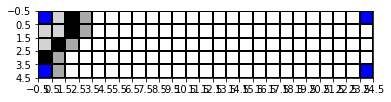

****end of grid display
while n_k > 0: 
largest b_i = 27 , placed 27 last
drop c_j = 0, j = 3
drop c_j = 0, j = 28
drop c_j = 0, j = 101
largest b_i = 51 , placed 51 last
drop c_j = 0, j = 52
drop c_j = 0, j = 76
largest b_i = 75 , placed 75 last
largest b_i = 2 , placed 2 last
n_k = 0, break
end of while n_k > 0
current e_vector: [  0  24 100 124  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   2  75  51  27]



=-=-=--=-=-=-=--=--=-=-=-=-=-=--=-=-=-=-=-=-=--=-=-=-=--=--=-=-=-=-=-=--=-=-=-=-
<><><> Grid with p = 25 q = 25 <><><>
>>>> Round Iteration 0 :

++++ Normal

255 623 4.0 3.845906902086677

256 623 4.0 3.845906902086677

257 623 4.0 3.845906902086677

258 623 4.0 3.845906902086677

259 623 4.0 3.845906902086677

260 623 4.0 3.845906902086677

261 623 4.0 3.845906902086677

262 623 4.0 3.845906902086677

263 623 4.0 3.845906902086677

264 623 4.0 3.845906902086677

265 623 4.0 3.845906902086677

266 623 4.0 3.845906902086677

267 623 4.0 3.845906902086677

268 623 4.0 3.845906902086677

269 623 4.0 3.845906902086677

270 623 4.0 3.845906902086677

271 623 4.0 3.845906902086677

272 623 4.0 3.845906902086677

273 623 4.0 3.845906902086677

274 623 3.0 3.845906902086677

275 623 3.0 3.845906902086677

276 623 4.0 3.845906902086677

277 623 4.0 3.845906902086677

278 623 4.0 3.845906902086677

279 623 4.0 3.845906902086677

280 623 4.0 3.845906902086677

281 623 4.0 3.845906902086677

282 623 4.0 3.845906902086677

283 623 4.0 3.845906902086677

284 623 4.0 3.845906902086677

285 623 4.0 3.845906902086677

286 623 4.0 3.845906902086677

287 623 

543 623 4.0 3.845906902086677

544 623 4.0 3.845906902086677

545 623 4.0 3.845906902086677

546 623 4.0 3.845906902086677

547 623 4.0 3.845906902086677

548 623 4.0 3.845906902086677

549 623 3.0 3.845906902086677

550 623 3.0 3.845906902086677

551 623 4.0 3.845906902086677

552 623 4.0 3.845906902086677

553 623 4.0 3.845906902086677

554 623 4.0 3.845906902086677

555 623 4.0 3.845906902086677

556 623 4.0 3.845906902086677

557 623 4.0 3.845906902086677

558 623 4.0 3.845906902086677

559 623 4.0 3.845906902086677

560 623 4.0 3.845906902086677

561 623 4.0 3.845906902086677

562 623 4.0 3.845906902086677

563 623 4.0 3.845906902086677

564 623 4.0 3.845906902086677

565 623 4.0 3.845906902086677

566 623 4.0 3.845906902086677

567 623 4.0 3.845906902086677

568 623 4.0 3.845906902086677

569 623 4.0 3.845906902086677

570 623 4.0 3.845906902086677

571 623 4.0 3.845906902086677

572 623 4.0 3.845906902086677

573 623 4.0 3.845906902086677

574 623 3.0 3.845906902086677

575 623 

102 621 4.0 3.8518518518518516

103 621 4.0 3.8518518518518516

104 621 4.0 3.8518518518518516

105 621 4.0 3.8518518518518516

106 621 4.0 3.8518518518518516

107 621 4.0 3.8518518518518516

108 621 4.0 3.8518518518518516

109 621 4.0 3.8518518518518516

110 621 4.0 3.8518518518518516

111 621 4.0 3.8518518518518516

112 621 4.0 3.8518518518518516

113 621 4.0 3.8518518518518516

114 621 4.0 3.8518518518518516

115 621 4.0 3.8518518518518516

116 621 4.0 3.8518518518518516

117 621 4.0 3.8518518518518516

118 621 4.0 3.8518518518518516

119 621 4.0 3.8518518518518516

120 621 4.0 3.8518518518518516

121 621 4.0 3.8518518518518516

122 621 4.0 3.8518518518518516

123 621 4.0 3.8518518518518516

124 621 3.0 3.8518518518518516

125 621 3.0 3.8518518518518516

126 621 4.0 3.8518518518518516

127 621 4.0 3.8518518518518516

128 621 4.0 3.8518518518518516

129 621 4.0 3.8518518518518516

130 621 4.0 3.8518518518518516

131 621 4.0 3.8518518518518516

132 621 4.0 3.8518518518518516

133 621 

363 621 4.0 3.8518518518518516

364 621 4.0 3.8518518518518516

365 621 4.0 3.8518518518518516

366 621 4.0 3.8518518518518516

367 621 4.0 3.8518518518518516

368 621 4.0 3.8518518518518516

369 621 4.0 3.8518518518518516

370 621 4.0 3.8518518518518516

371 621 4.0 3.8518518518518516

372 621 4.0 3.8518518518518516

373 621 4.0 3.8518518518518516

374 621 3.0 3.8518518518518516

375 621 3.0 3.8518518518518516

376 621 4.0 3.8518518518518516

377 621 4.0 3.8518518518518516

378 621 4.0 3.8518518518518516

379 621 4.0 3.8518518518518516

380 621 4.0 3.8518518518518516

381 621 4.0 3.8518518518518516

382 621 4.0 3.8518518518518516

383 621 4.0 3.8518518518518516

384 621 4.0 3.8518518518518516

385 621 4.0 3.8518518518518516

386 621 4.0 3.8518518518518516

387 621 4.0 3.8518518518518516

388 621 4.0 3.8518518518518516

389 621 4.0 3.8518518518518516

390 621 4.0 3.8518518518518516

391 621 4.0 3.8518518518518516

392 621 4.0 3.8518518518518516

393 621 4.0 3.8518518518518516

394 621 

step 2, d, M, s: 45.0 [599 623] 621
n_k: [ 1.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20.
 21. 22. 23. 24. 25. 26. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12.
 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.] 

step 3: 
d > d', goto 2

step 2, d, M, s: 46.0 [25] 621
n_k: [ 1.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13.
 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  1.] 

step 3: 
d > d', goto 2

step 2, d, M, s: 46.0 [599] 621
n_k: [ 1.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13.
 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  1.] 

step 4:
k = 0
(k < d-1) and (n[k] <= n[k+1] < n[k+2]) and (u > 0.4*s) condition reached, increment k
k = 1
(k < d-1) and (n[k] <= n[k+1] < n[k+2]) and (u > 0.4*s) condition reached, increment k
k = 2
(k < d-1) and (n[k] <= n[k+1] < n[k+2]) and (u > 0.4*s) co

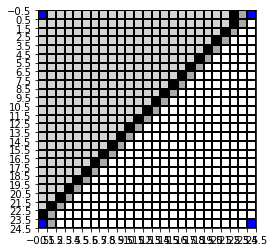

****end of grid display
while n_k > 0: 
largest b_i = 47 , placed 47 last
drop c_j = 0, j = 23
drop c_j = 0, j = 48
drop c_j = 0, j = 601
largest b_i = 71 , placed 71 last
drop c_j = 0, j = 72
drop c_j = 0, j = 96
drop c_j = 0, j = 120
drop c_j = 0, j = 144
drop c_j = 0, j = 168
drop c_j = 0, j = 192
drop c_j = 0, j = 216
drop c_j = 0, j = 240
drop c_j = 0, j = 264
drop c_j = 0, j = 288
drop c_j = 0, j = 312
drop c_j = 0, j = 336
drop c_j = 0, j = 360
drop c_j = 0, j = 384
drop c_j = 0, j = 408
drop c_j = 0, j = 432
drop c_j = 0, j = 456
drop c_j = 0, j = 480
drop c_j = 0, j = 504
drop c_j = 0, j = 528
drop c_j = 0, j = 552
drop c_j = 0, j = 576
largest b_i = 95 , placed 95 last
largest b_i = 119 , placed 119 last
largest b_i = 143 , placed 143 last
largest b_i = 167 , placed 167 last
largest b_i = 191 , placed 191 last
largest b_i = 215 , placed 215 last
largest b_i = 239 , placed 239 last
largest b_i = 263 , placed 263 last
largest b_i = 287 , placed 287 last
largest b_i = 311 , plac

In [2]:
'''First round visualization only:'''
#p = [2,5,5,25]
#q = [4,5,25,25]
q = list(range(1,11))
p = [5]*len(q)
print("q =",q)
print("p =",p)
for i in range(len(p)):
    print("\n\n=-=-=--=-=-=-=--=--=-=-=-=-=-=--=-=-=-=-=-=-=--=-=-=-=--=--=-=-=-=-=-=--=-=-=-=-")
    print("<><><> Grid with p =",p[i],"q =",q[i],"<><><>")
    grid = eo.grid_generator(p[i],q[i],0) #generate grid matrix

    #elimination ordering:
    EO = eo.elimination_ordering_class(grid, visualization=True, p=p[i], q=q[i]) #must be on global scope
    e = EO.elimination_ordering(grid)
